<a href="https://colab.research.google.com/github/cwwade04/CIS-3902-Data-Mining/blob/main/Linear_Regression_with_the_California_Wildfires_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
fire_df = pd.read_csv('/content/drive/MyDrive/cis3902/California_Fire_Incidents.csv')
fire_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [9]:
# Select relevant columns and drop missing values
df = fire_df[['AcresBurned', 'PersonnelInvolved']].dropna()
df = df[df['AcresBurned'] > 0]  # ensure fire size is positive

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 4 to 1626
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AcresBurned        203 non-null    float64
 1   PersonnelInvolved  203 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


Text(0.5, 1.0, 'Personnel Involved vs. Acres Burned')

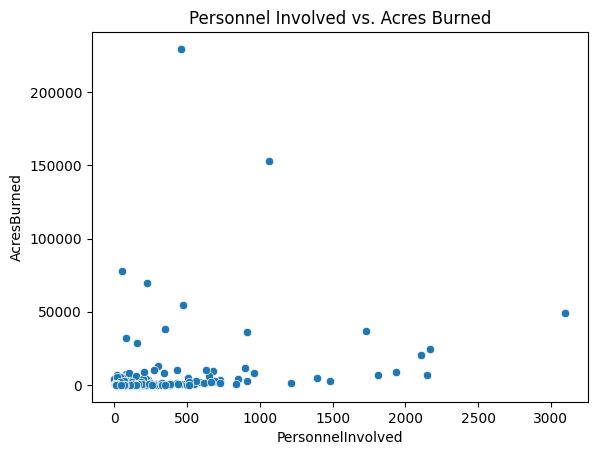

In [10]:
# Visualize the relationship between PersonnelInvolved and AcresBurned
sns.scatterplot(data=df, x='PersonnelInvolved', y='AcresBurned')
plt.title('Personnel Involved vs. Acres Burned')

In [11]:
# Check correlation
df.corr()

,AcresBurned,PersonnelInvolved
AcresBurned,1.000000,0.259069
PersonnelInvolved,0.259069,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[['PersonnelInvolved']]
y = df['AcresBurned']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
print('MAE:', mean_absolute_error(y_test, predictions))
print('R^2 Score:', r2_score(y_test, predictions))
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

MAE: 8209.246764382224
R^2 Score: 0.034206326198124026
Coefficient: 15.670861250269404
Intercept: 3216.32050303658


Mean Absolute Error tells us how far off the predictions are, on average. If the MAE is around 7,800 acres, it means the model’s predictions deviate by about 7,800 acres from the actual fire sizes.

R^2 measures how much of the variation in fire size is explained by the number of personnel involved. An R score of 0.29 means that about 29% of the variability in fire size is accounted for by this single feature, indicating a weak but present linear relationship.

Text(0, 0.5, 'Acres Burned')

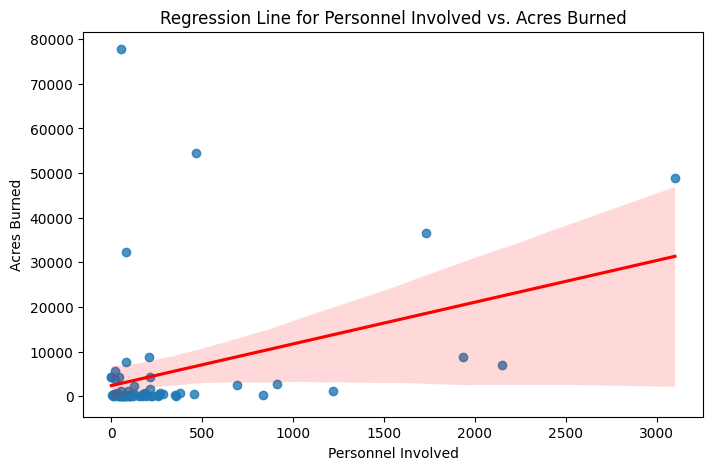

In [13]:
# Plot regression line
plt.figure(figsize=(8,5))
sns.regplot(x=X_test['PersonnelInvolved'], y=y_test, line_kws={'color': 'red'})
plt.title('Regression Line for Personnel Involved vs. Acres Burned')
plt.xlabel('Personnel Involved')
plt.ylabel('Acres Burned')

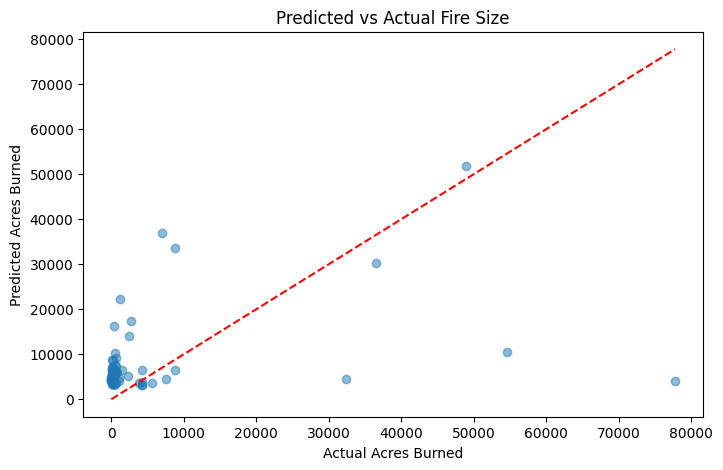

In [14]:
# Scatter plot: predicted vs actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Acres Burned')
plt.ylabel('Predicted Acres Burned')
plt.title('Predicted vs Actual Fire Size')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

Text(0.5, 1.0, 'Residual Plot')

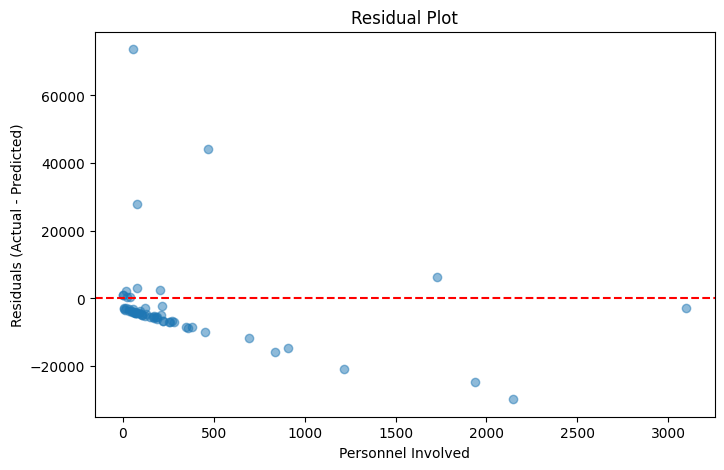

In [15]:
# Residual plot
residuals = y_test - predictions
plt.figure(figsize=(8,5))
plt.scatter(X_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Personnel Involved')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')